In [57]:
library(igraph)
load("~/Downloads/astrocollab.Rdata")
load("football")
summary(astrocollab)

Warning message:
In readChar(con, 5L, useBytes = TRUE): cannot open compressed file 'football', probable reason 'No such file or directory'

ERROR: Error in readChar(con, 5L, useBytes = TRUE): cannot open the connection


IGRAPH UNW- 16706 121251 -- Astrophysics collaborations
+ attr: name (g/c), Author (g/c), Citation (g/c), URL (g/c),
| Description (g/c), name (v/c), weight (e/n)


In [7]:
#sample igraph and return graph object to experiment on the file
g <- simplify(astrocollab)

In [8]:
typeof(g)

[1] "list"

In [36]:
obj <- sample(g)
class(obj)

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

### Ok, we need to convert the sample from a dgCMatrix back to an igraph:

In [37]:
## node info
nodes <- data.frame(name=rownames(obj))
nodenames <- rownames(obj)

In [38]:
 ## adjacency matrix
adjM <- obj
tmp <- which(as.matrix(adjM!=0), arr.ind=T)

In [41]:
#undirect graph
tmp <- tmp[tmp[,1]<tmp[,2],]


In [45]:
#define that there is no weight flag (look at function for more detail)
weight_flag <- F

In [51]:
relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]])
relations <- na.omit(relations)

In [52]:
relations

,from,to
1,"PILDIS, RA","GOLDMAN, I"
2,"PILDIS, RA","BREGMAN, JN"
3,"HARKNESS, RP","WANDEL, A"
4,"SUTHERLAND, PG","WANDEL, A"
5,"SWARTZ, DA","BIERMANN, PL"
6,"HARKNESS, RP","BIERMANN, PL"
7,"SWARTZ, DA","EVRARD, AE"
8,"SUTHERLAND, PG","EVRARD, AE"


In [54]:
objConverted <- igraph::graph.data.frame(d=relations, directed=F, vertices=nodes)

In [55]:
objConverted

IGRAPH UN-- 10 8 -- 
+ attr: name (v/c)
+ edges (vertex names):
[1] PILDIS, RA    --GOLDMAN, I   PILDIS, RA    --BREGMAN, JN 
[3] HARKNESS, RP  --WANDEL, A    SUTHERLAND, PG--WANDEL, A   
[5] SWARTZ, DA    --BIERMANN, PL HARKNESS, RP  --BIERMANN, PL
[7] SWARTZ, DA    --EVRARD, AE   SUTHERLAND, PG--EVRARD, AE  

#### Perform some of the functions from PPT

In [56]:
V(objConverted)

+ 10/10 vertices, named:
 [1] STANEV, TKGT   PILDIS, RA     SWARTZ, DA     HARKNESS, RP   SUTHERLAND, PG
 [6] GOLDMAN, I     BREGMAN, JN    WANDEL, A      BIERMANN, PL   EVRARD, AE    

In [58]:
E(objConverted)

+ 8/8 edges (vertex names):
[1] PILDIS, RA    --GOLDMAN, I   PILDIS, RA    --BREGMAN, JN 
[3] HARKNESS, RP  --WANDEL, A    SUTHERLAND, PG--WANDEL, A   
[5] SWARTZ, DA    --BIERMANN, PL HARKNESS, RP  --BIERMANN, PL
[7] SWARTZ, DA    --EVRARD, AE   SUTHERLAND, PG--EVRARD, AE  

In [59]:
vertex_attr(objConverted)

$name
 [1] "STANEV, TKGT"   "PILDIS, RA"     "SWARTZ, DA"     "HARKNESS, RP"  
 [5] "SUTHERLAND, PG" "GOLDMAN, I"     "BREGMAN, JN"    "WANDEL, A"     
 [9] "BIERMANN, PL"   "EVRARD, AE"

In [60]:
try <- upgrade_graph(objConverted)

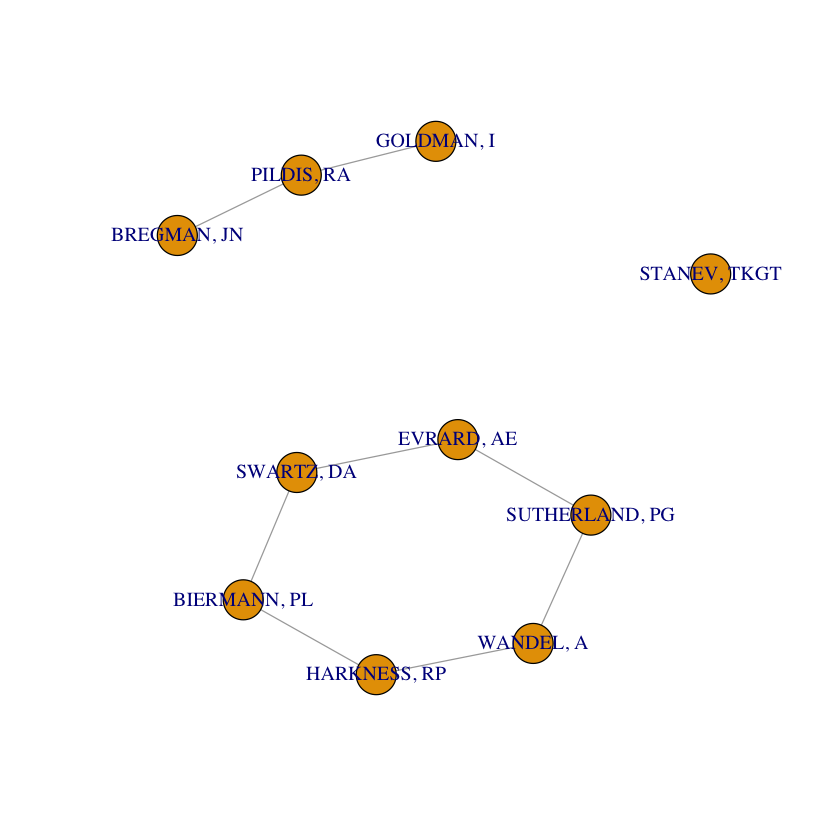

In [61]:
plot(try)

In [62]:
degree(try)

STANEV, TKGT     PILDIS, RA     SWARTZ, DA   HARKNESS, RP SUTHERLAND, PG 
             0              2              2              2              2 
    GOLDMAN, I    BREGMAN, JN      WANDEL, A   BIERMANN, PL     EVRARD, AE 
             1              1              2              2              2

*********************************************************************************************************************

## Function used to convert to sample of igraph

In [31]:
uConverter <- function (obj, from=c("dgCMatrix","igraph"), to=c("igraph","dgCMatrix"), verbose=TRUE)
{
    
    from <- match.arg(from)
    to <- match.arg(to)
    
    if (class(obj) != from){
        stop(sprintf("The class of your input object '%s' is '%s', mismatched as you intended (from='%s').\n", deparse(substitute(obj)), class(obj), from))
    }
    
    if(from!="igraph" & to!="igraph"){
        stop(sprintf("Conversion between '%s' and '%s' is not supported.\n", from, to))
    }
    
    if(from==to){
        warnings(sprintf("Since the class '%s' converted from is the same as the class '%s' converted to, it will return exactly what you input.\n", from, to))
        return(obj)
    }
    
    if(from=="igraph"){
        
        ## get node data frame
        data <- igraph::get.data.frame(obj, what="vertices")
        
        ## get adjacency matrix
        if ("weight" %in% list.edge.attributes(obj)){
            objConverted <- igraph::get.adjacency(obj, type="both", attr="weight", edges=F, names=T, sparse=getIgraphOpt("sparsematrices"))
        }else{
            objConverted <- igraph::get.adjacency(obj, type="both", attr=NULL, edges=F, names=T, sparse=getIgraphOpt("sparsematrices"))
        }
        
    }else if(from=="dgCMatrix"){
        
        ## node info
        nodes <- data.frame(name=rownames(obj))
        nodenames <- rownames(obj)
        
        ## adjacency matrix
        adjM <- obj
        tmp <- which(as.matrix(adjM!=0), arr.ind=T)
        
        ## un-direct graph
        if(from=="dgCMatrix"){
            tmp <- tmp[tmp[,1]<tmp[,2],]
        }
        
        ## weighted or not
        weight_flag <- T
        if(all(adjM[tmp]==1))
        {weight_flag <- F
        }
        if(weight_flag){
            relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]], weight=adjM[tmp])
        }else{
            relations <- data.frame(from=nodenames[tmp[,1]], to=nodenames[tmp[,2]])
        }
        
        ## convert to "igraph"
        if(from=="dgCMatrix"){
            objConverted <- igraph::graph.data.frame(d=relations, directed=F, vertices=nodes)
        }
        
    }
    
    if(verbose){
        message(sprintf("Your input object '%s' of class '%s' has been converted into an object of class '%s'.", deparse(substitute(obj)), from, to), appendLF=T)
    }
    
    return(objConverted)
}